In [15]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
import svis
from transform_datasets.patterns.natural import NaturalImagePatches, Omniglot
from transform_datasets.transforms import CenterMean, UnitStd, CyclicTranslation2D
from transform_datasets.dataset import TransformDataset
from torch.utils.data import DataLoader
import math
import copy
from harmonics.spectral.bispectrum import bispectrum_2d, bispectrum_2d_vectorized
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pattern = NaturalImagePatches(images=range(90), 
                              patch_size=28, 
                              min_contrast=10.0,
                              patches_per_image=1)
transform1 = CenterMean()
transform2 = UnitStd()
transform3 = CyclicTranslation2D(fraction_transforms=1.0)
dataset = TransformDataset(pattern, [transform1, transform2, transform3])

In [3]:
dataset.data.shape

torch.Size([70560, 28, 28])

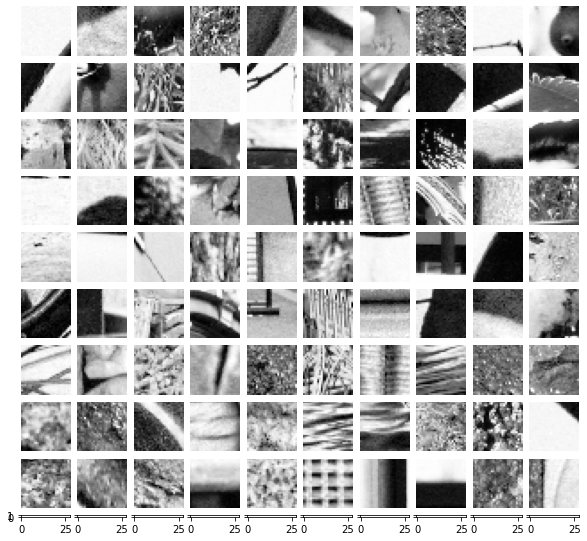

In [5]:
svis.image_grid(dataset.data[::784][:100], cmap="Greys_r", share_range=False)

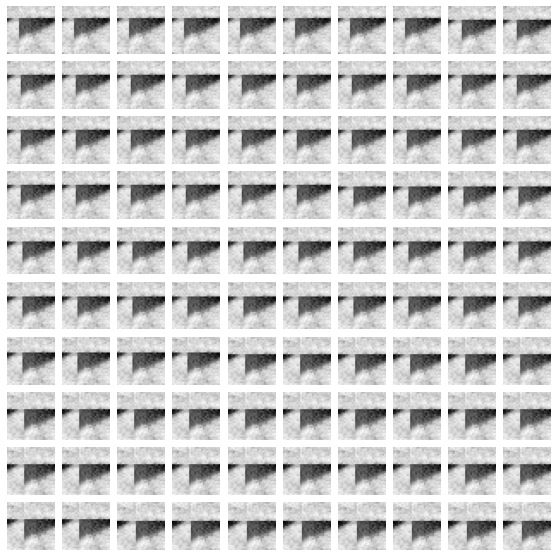

In [7]:
svis.image_grid(dataset.data[1000:1100], cmap="Greys_r", share_range=False)

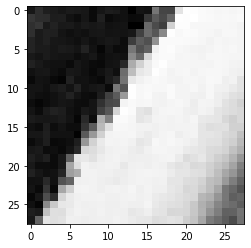

In [11]:
plt.imshow(pattern.data[10], cmap="Greys_r")

In [16]:
BS = bispectrum_2d(pattern.data[10])

In [18]:
BS = BS.squeeze()

In [31]:
BS -= BS.mean()
BS /= BS.std()

In [35]:
BS = BS.reshape((784, 784))

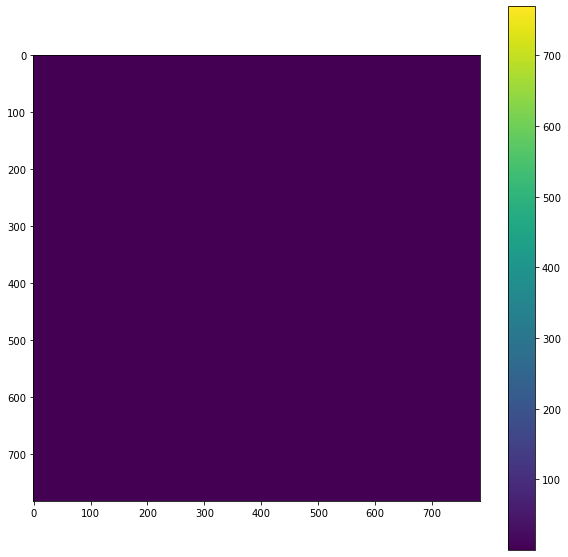

In [38]:
plt.figure(figsize=(10, 10))
plt.imshow(abs(BS))
plt.colorbar()